#Kidney stone classification using DEEP LEARNING 


### Mounting drive for data loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Loading the dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras import models,layers
import tensorflow as tf
import os

# from tensorflow import keras
# from tensorflow.keras import layers
print("D o n e ")

D o n e 


### Making constants

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

### Loading the image file in colab with tf.keras

In [1]:
! unzip '/content/drive/MyDrive/Msc AI /AI projects/kidney stone project/CT-KIDNEY-DATASET-Normal-Stone.zip'

# change this path with the path of your directory

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
# here we are loading the data from google drive folder to out notebook using tf.keras method of tensorflow 
data =tf.keras.preprocessing.image_dataset_from_directory(
    r'/content/CT-KIDNEY-DATASET-Normal-Stone',   # change this path with path of your directory
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = (BATCH_SIZE))

# we loaded all image data which contains 1899 images belonging to 5 classes 

Found 2777 files belonging to 2 classes.


In [ ]:
# here we are printing class names 
class_names = data.class_names
class_names

['Normal', 'Stone']

In [ ]:
len(data)

87

In [ ]:
1899/32 # this is why len(data) is 60 our batch size is 32

59.34375

In [ ]:
for image_batch, labels_batch in data.take(1):
    print('batch_size,dimensions,channels:',image_batch.shape)
    print(labels_batch.numpy())

batch_size,dimensions,channels: (32, 256, 256, 3)
[0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 1]


In [ ]:
for image_batch, labels_batch in data.take(1):
    print(image_batch[0].numpy())
# printing one image batch as numpy array

<Figure size 800x800 with 0 Axes>

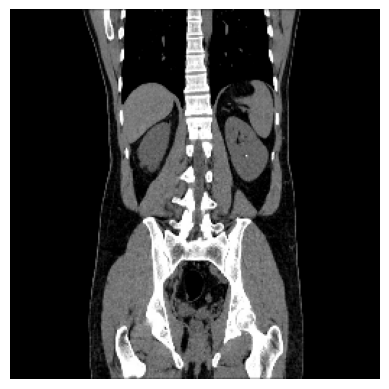

<Figure size 800x800 with 0 Axes>

In [ ]:
# sample image from data
plt.imshow(image_batch[3].numpy().astype("uint8"))
plt.axis("off")
plt.figure(figsize=(8,8))

### Visualizing the classes

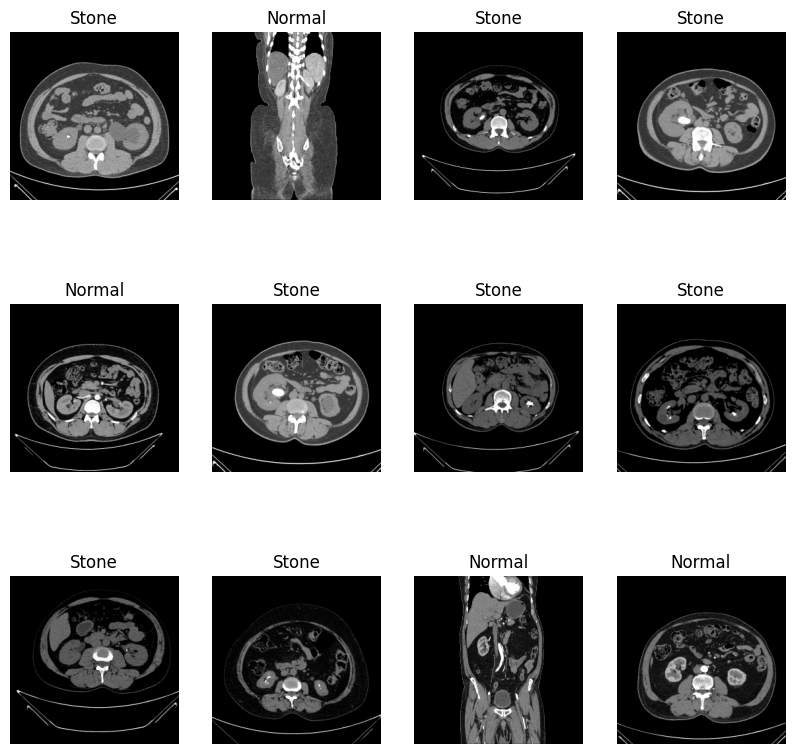

In [ ]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in data.take(1):
    for i in range(12):
      ax = plt.subplot(3,4,i+1)
      plt.imshow(image_batch[i].numpy().astype("uint8"))
      plt.title(class_names[labels_batch[i]])
      plt.axis("off")
    

### Train_Test_Split

In [ ]:
len(data)

87

In [ ]:
train_size = 0.8
len(data)*train_size

69.60000000000001

In [ ]:
train_ds = data.take(69)
len(train_ds)

69

In [ ]:
test_ds = data.skip(69)
len(test_ds)

18

In [ ]:
val_size = 0.1
len(data)*val_size

8.700000000000001

In [ ]:
#val_ds = test_ds.take(7)
#len(val_ds)

In [ ]:
val_ds = test_ds.take(8)
len(val_ds)

8

In [ ]:
test_ds = test_ds.skip(8)
len(test_ds)

10

### Partitioning the data

In [ ]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):

  ds_size = len(ds)
  
  if shuffle:
    ds = ds.shuffle(shuffle_size, seed=12)
  
  train_size = int(train_split*ds_size)
  val_size = int(val_split*ds_size)

  train_ds = ds.take(train_size)

  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)
  
  return train_ds,val_ds,test_ds

In [ ]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(data)

In [ ]:
len(train_ds)

69

In [ ]:
len(val_ds)

8

In [ ]:
len(test_ds)

10

Cache, Shuffle, and Prefetch the Dataset

In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
print('done')

done


## Model Building 

## Model _1 user defined CNN

In [ ]:
# data preprocessing 
resize_and_rescale=tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),

])

In [ ]:
# here we are performing data augmentation using keras
data_augmentation=tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),

])

In [ ]:
# Defining the model
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 2
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax'),
])
model.build(input_shape=input_shape)
print('done')

done


In [ ]:
model.summary()

# here model is defined with 183877 learnable parameters

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [ ]:
# model compiler and adding optimizer (adam)
from tensorflow.python.data.ops.options import OptimizationOptions
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= False),
    metrics =['accuracy'])
print('done')

done


In [ ]:
# # adding early stopping to prevent over fitting
# early_stopping = keras.callbacks.EarlyStopping(
#     patience=10,
#     min_delta=0.001,
#     restore_best_weights=True,
# )

In [ ]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=20,
    # callbacks=[early_stopping]
)

Epoch 1/20
69/69 [==============================] - 38s 211ms/step - loss: 0.6069 - accuracy: 0.6549 - val_loss: 0.6060 - val_accuracy: 0.6641
Epoch 2/20
69/69 [==============================] - 4s 59ms/step - loss: 0.5044 - accuracy: 0.7332 - val_loss: 0.4730 - val_accuracy: 0.7461
Epoch 3/20
69/69 [==============================] - 4s 63ms/step - loss: 0.4088 - accuracy: 0.7985 - val_loss: 0.3606 - val_accuracy: 0.8359
Epoch 4/20
69/69 [==============================] - 4s 59ms/step - loss: 0.3289 - accuracy: 0.8551 - val_loss: 0.2614 - val_accuracy: 0.8984
Epoch 5/20
69/69 [==============================] - 4s 59ms/step - loss: 0.1548 - accuracy: 0.9488 - val_loss: 0.1581 - val_accuracy: 0.9492
Epoch 6/20
69/69 [==============================] - 4s 60ms/step - loss: 0.0872 - accuracy: 0.9697 - val_loss: 0.1875 - val_accuracy: 0.9258
Epoch 7/20
69/69 [==============================] - 4s 60ms/step - loss: 0.0884 - accuracy: 0.9701 - val_loss: 0.1400 - val_accuracy: 0.9414
Epoch 8/20


In [ ]:
scores = model.evaluate(test_ds)

10/10 [==============================] - 10s 28ms/step - loss: 0.0586 - accuracy: 0.9750


In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 69}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
len(history.history['loss'])

20

In [ ]:
type(history.history['loss'])

list

In [ ]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.60685795545578,
 0.5043719410896301,
 0.4088359475135803,
 0.3288622796535492,
 0.15478239953517914]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

### Plot of training vs val accuracy model_1

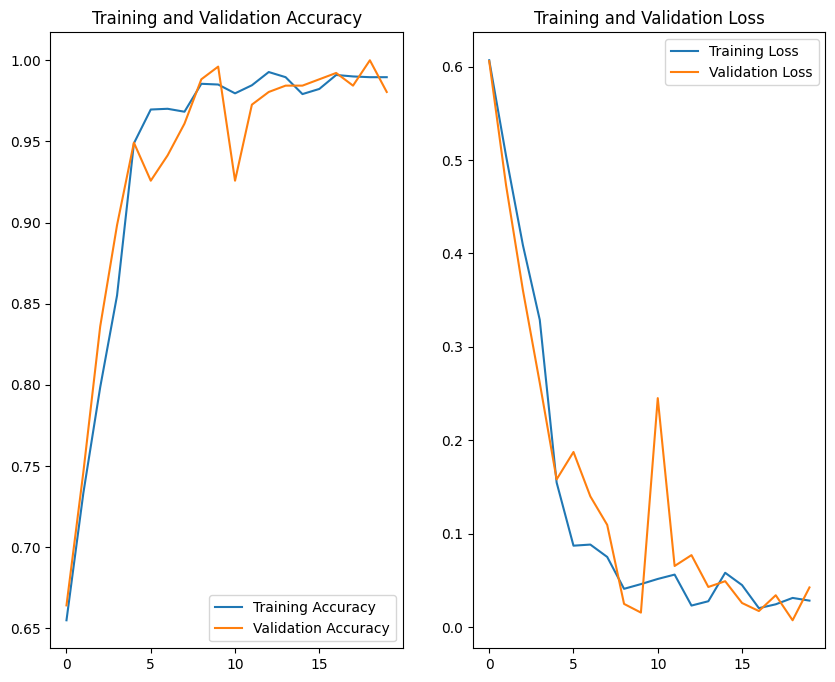

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(1, 2, 1)
plt.plot(range(20), acc, label='Training Accuracy')
plt.plot(range(20), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(20), loss, label='Training Loss')
plt.plot(range(20), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Run prediction on a sample image

first image to predict
actual label: Stone
1/1 [==============================] - 0s 52ms/step
predicted label: Stone


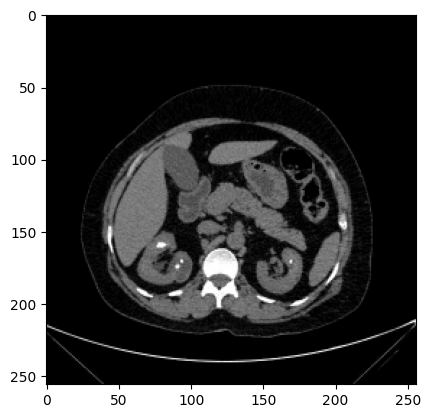

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[20].numpy().astype('uint8')
    first_label = labels_batch[20].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[20])])

In [ ]:
batch_prediction[20]

array([8.071170e-05, 9.999193e-01], dtype=float32)

Write a function for inference

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

Now run inference on few sample images

1/1 [==============================] - 0s 18ms/step


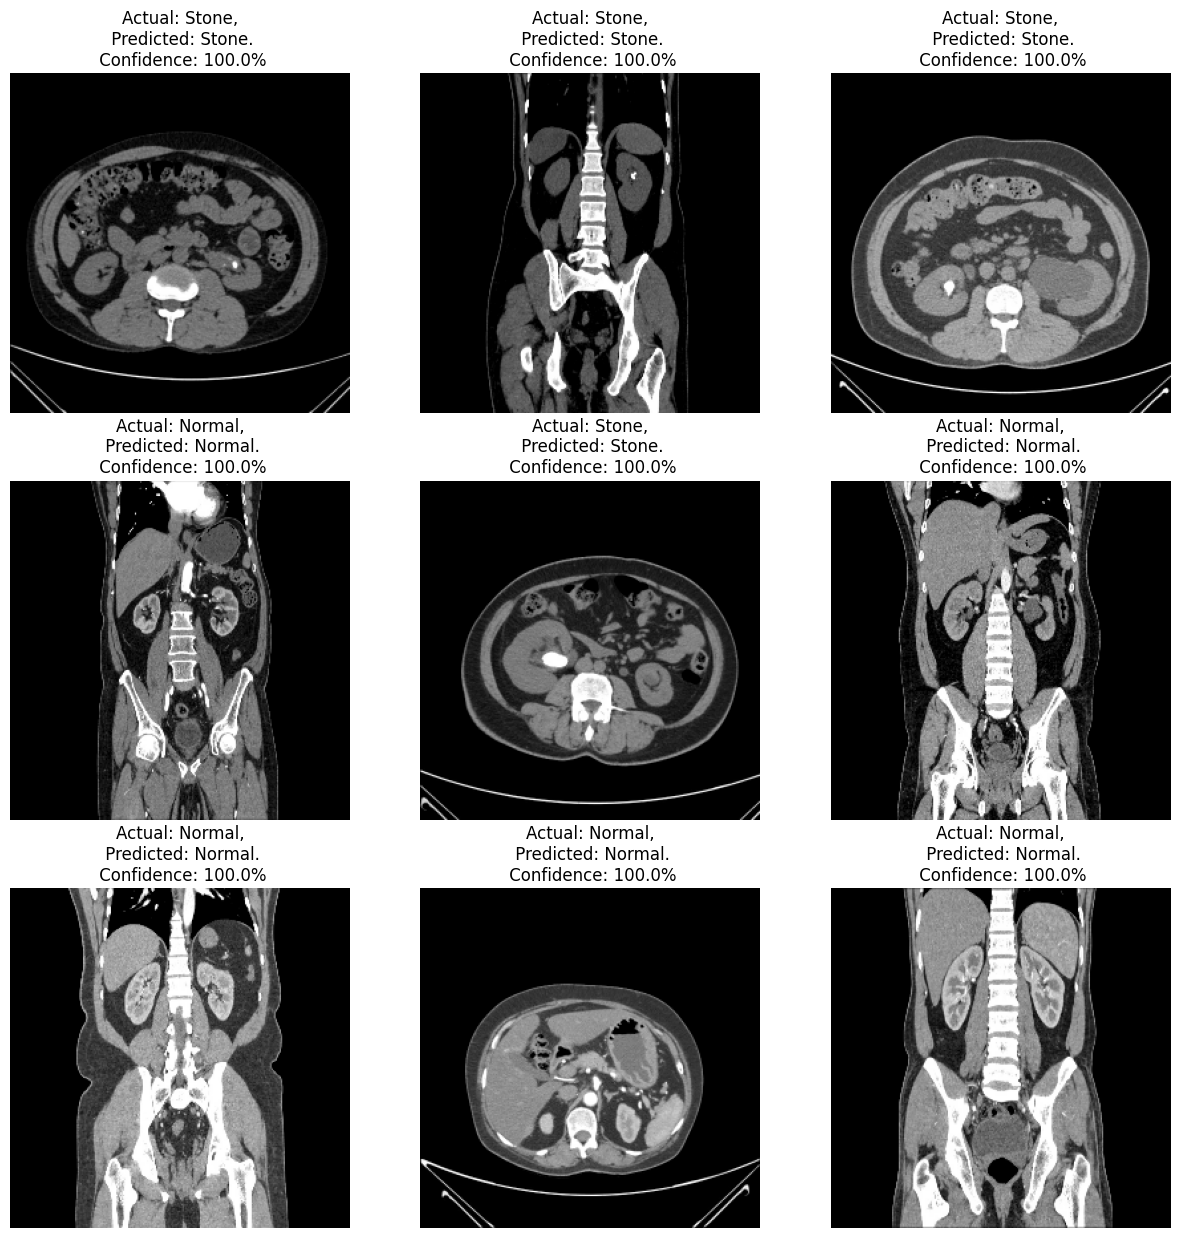

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
import os
model_version =([int (i) for i in os.listdir("/content/drive/MyDrive/Msc AI /models")])
model.save(f"/content/drive/MyDrive/Msc AI /models{model_version}")

In [ ]:
model.save("/content/drive/MyDrive/Msc AI /models/kidney_model.h5")

In [ ]:
import tensorflow as tf

# Load the model
model = tf.keras.models.load_model('/content/drive/MyDrive/Msc AI /models/kidney_model.h5')

# Use the model for prediction or other tasks
predictions = model.predict('/content/Stone- (1).jpg')


# Conclusion 

Training Accuracy on CNN model : 98.83 %

Validation Accuracy on CNN model :98.44 %

In this project I have built a sequiential CNN model that is trained on CT scan images that contain kidney stone and those who does not contain kidney stone. we got excellent results.
